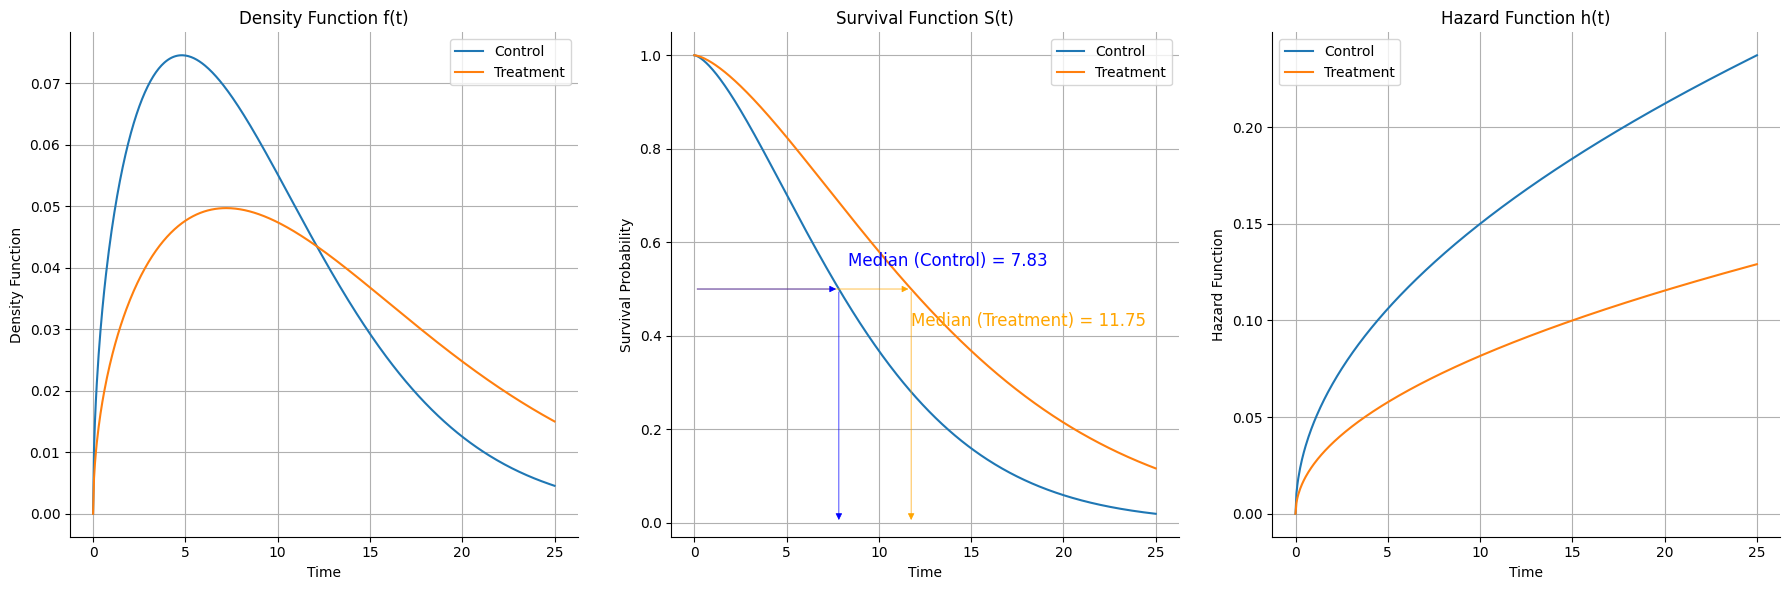

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Weibull parameters for the two arms
c1, scale1 = 1.5, 10  # Control arm
c2, scale2 = 1.5, 15  # Treatment arm

# Define time range
t = np.linspace(0, 25, 500)

# Survival functions
S1 = weibull_min.sf(t, c1, scale=scale1)
S2 = weibull_min.sf(t, c2, scale=scale2)

# Hazard functions
h1 = weibull_min.pdf(t, c1, scale=scale1) / weibull_min.sf(t, c1, scale=scale1)
h2 = weibull_min.pdf(t, c2, scale=scale2) / weibull_min.sf(t, c2, scale=scale2)

# Density functions
f1 = weibull_min.pdf(t, c1, scale=scale1)
f2 = weibull_min.pdf(t, c2, scale=scale2)

# Median survival times
median1 = scale1 * (np.log(2))**(1/c1)
median2 = scale2 * (np.log(2))**(1/c2)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Density function
axes[0].plot(t, f1, label='Control')
axes[0].plot(t, f2, label='Treatment')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Density Function')
axes[0].set_title('Density Function f(t)')
axes[0].legend()
axes[0].grid(True)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot Survival function
axes[1].plot(t, S1, label='Control')
axes[1].plot(t, S2, label='Treatment')
# axes[1].axhline(0.5, color='gray', linestyle='--')
# axes[1].axvline(median1, color='blue', linestyle='--')
# axes[1].axvline(median2, color='orange', linestyle='--')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Survival Probability')
axes[1].set_title('Survival Function S(t)')
axes[1].legend()
axes[1].grid(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Plot Hazard function
axes[2].plot(t, h1, label='Control')
axes[2].plot(t, h2, label='Treatment')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Hazard Function')
axes[2].set_title('Hazard Function h(t)')
axes[2].legend()
axes[2].grid(True)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Highlight median survival times
for ax in axes:
    ax.annotate('', xy=(median2, 0.5), xytext=(0, 0.5),
                arrowprops=dict(arrowstyle='-|>', color='orange', lw=.5))
    ax.annotate('', xy=(median2, 0.5), xytext=(median2, 0),
                arrowprops=dict(arrowstyle='<|-', color='orange', lw=.5))
    ax.annotate('', xy=(median1, 0.5), xytext=(0, 0.5),
                arrowprops=dict(arrowstyle='-|>', color='blue', lw=.5))
    ax.annotate('', xy=(median1, 0.5), xytext=(median1, 0),
                arrowprops=dict(arrowstyle='<|-', color='blue', lw=.5))
    ax.annotate(f'Median (Control) = {median1:.2f}', xy=(median1, 0.5), xytext=(median1 + .5, 0.55),
                fontsize=12, color='blue')
    ax.annotate(f'Median (Treatment) = {median2:.2f}', xy=(median2, 0.5), xytext=(median2 + 0, 0.42),
                fontsize=12, color='orange')

plt.tight_layout()
plt.show()

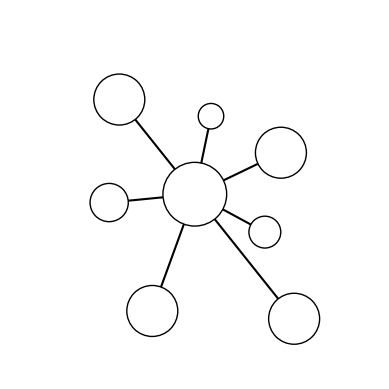

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw a hub and spoke diagram with specified node sizes and lengths
def draw_hub_and_spoke(hub_size, spoke_specs, filename):
    # Define the hub position
    hub = np.array([0, 0])
    
    # Create the figure and axis
    fig, ax = plt.subplots()
    
    # Draw the hub
    hub_circle = plt.Circle(hub, hub_size, color='white', ec='black', zorder=2)
    ax.add_patch(hub_circle)
    
    # Draw the spokes
    for angle, (length, size) in spoke_specs:
        # Calculate spoke position based on angle and length
        spoke = np.array([length * np.cos(angle), length * np.sin(angle)])
        
        # Draw line from hub to spoke
        ax.plot([hub[0], spoke[0]], [hub[1], spoke[1]], 'k-', zorder=1)
        
        # Draw spoke node
        spoke_circle = plt.Circle(spoke, size, color='white', ec='black', zorder=2)
        ax.add_patch(spoke_circle)
    
    # Set aspect of the plot to be equal
    ax.set_aspect('equal')
    
    # Hide axes
    ax.axis('off')
    
    # Set limits to make sure everything fits in the plot
    max_extent = max(length for angle, (length, size) in spoke_specs) + max(size for angle, (length, size) in spoke_specs)
    ax.set_xlim([-max_extent, max_extent])
    ax.set_ylim([-max_extent, max_extent])
    
    # Save the plot to a file
    plt.savefig(filename, bbox_inches='tight')
    
    # Show the plot
    plt.show()

hub_size = 1

# Specify the angles (in radians), lengths, and sizes for each spoke in clockwise order
spoke_specs = [
    (np.pi / 2.3, (2.5, 0.4)), # first     
    (np.pi / 7, (3, 0.8)), # 2nd           
    (7 * np.pi / 3.8, (2.5, 0.5)), # 3rd
    (3 * np.pi / 1.75, (5, 0.8)),   # 4th 
    (5 * np.pi / 3.6, (3.9, 0.8)), # 3rd  
    (np.pi/ .97, (2.7, 0.6)),        # 2nd  
    (3 * np.pi / 4.2, (3.8, 0.8)) # last  
]

# Specify the filename to save the plot
filename = "hub_and_spoke.png"

# Call the function to draw the hub and spoke diagram and save it to a file
draw_hub_and_spoke(hub_size, spoke_specs, filename)


In [3]:
import numpy as np

print(np.pi)


3.141592653589793


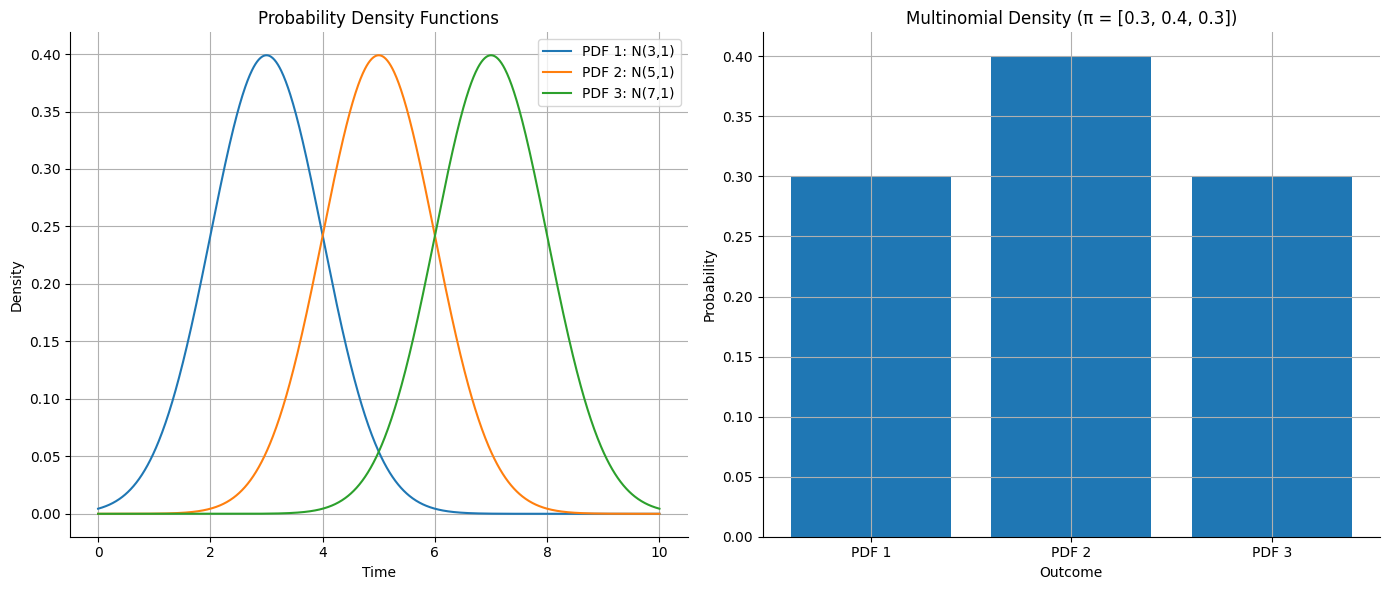

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multinomial

# Time points
t = np.linspace(0, 10, 1000)

# PDFs: Normal distributions
f1 = norm.pdf(t, loc=3, scale=1)
f2 = norm.pdf(t, loc=5, scale=1)
f3 = norm.pdf(t, loc=7, scale=1)

# Multinomial density
pi = [0.3, 0.4, 0.3]
multi_density = multinomial.pmf([1, 0, 0], n=1, p=pi)

# Plotting the PDFs and Multinomial density
plt.figure(figsize=(14, 6))

# PDFs
plt.subplot(1, 2, 1)
plt.plot(t, f1, label='PDF 1: N(3,1)')
plt.plot(t, f2, label='PDF 2: N(5,1)')
plt.plot(t, f3, label='PDF 3: N(7,1)')
plt.title('Probability Density Functions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Multinomial density
plt.subplot(1, 2, 2)
plt.bar(['PDF 1', 'PDF 2', 'PDF 3'], pi)
plt.title('Multinomial Density (π = [0.3, 0.4, 0.3])')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


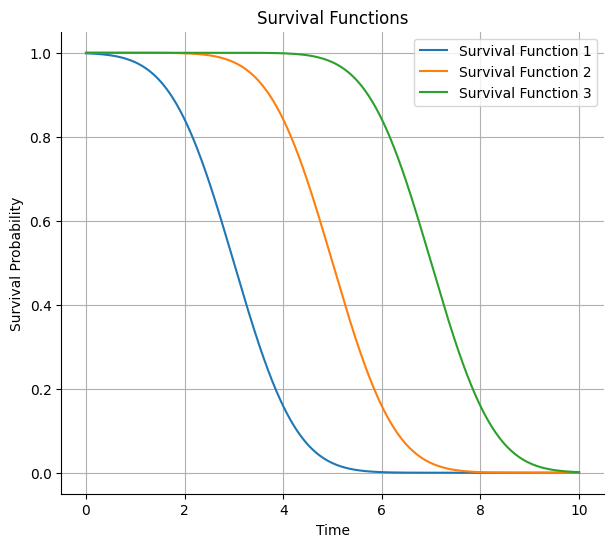

In [5]:
# Survival functions
S1 = 1 - norm.cdf(t, loc=3, scale=1)
S2 = 1 - norm.cdf(t, loc=5, scale=1)
S3 = 1 - norm.cdf(t, loc=7, scale=1)

# Plotting the survival functions
plt.figure(figsize=(7, 6))
plt.plot(t, S1, label='Survival Function 1')
plt.plot(t, S2, label='Survival Function 2')
plt.plot(t, S3, label='Survival Function 3')
plt.title('Survival Functions')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


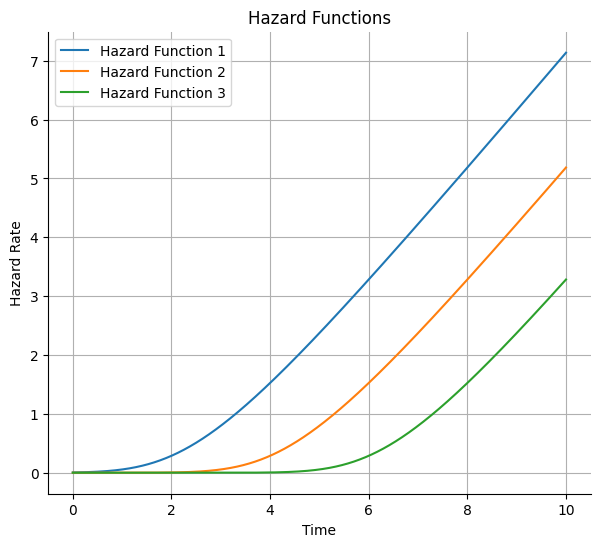

In [6]:
# Hazard functions
h1 = f1 / S1
h2 = f2 / S2
h3 = f3 / S3

# Plotting the hazard functions
plt.figure(figsize=(7, 6))
plt.plot(t, h1, label='Hazard Function 1')
plt.plot(t, h2, label='Hazard Function 2')
plt.plot(t, h3, label='Hazard Function 3')
plt.title('Hazard Functions')
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.legend()
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [7]:
# Simulate data
np.random.seed(0)
X = np.random.rand(100, 3)
Y = np.random.rand(100, 1)

# Compute beta coefficient vector
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

beta


array([[0.17319547],
       [0.4104582 ],
       [0.25805577]])

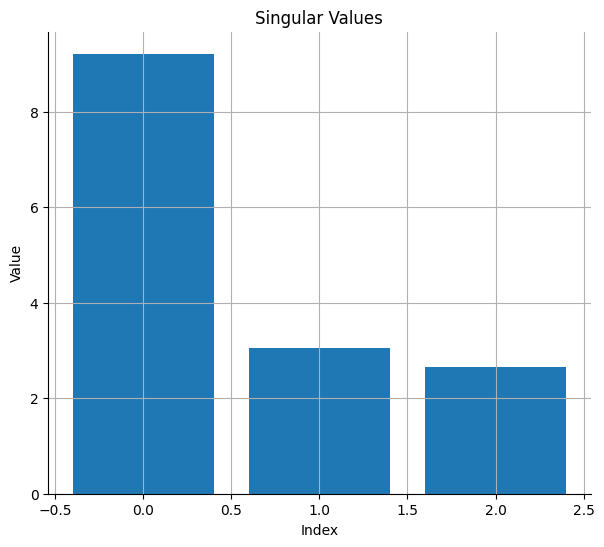

In [8]:
# SVD
U, Sigma, Vt = np.linalg.svd(X)

# Visualize singular values
plt.figure(figsize=(7, 6))
plt.bar(range(len(Sigma)), Sigma)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


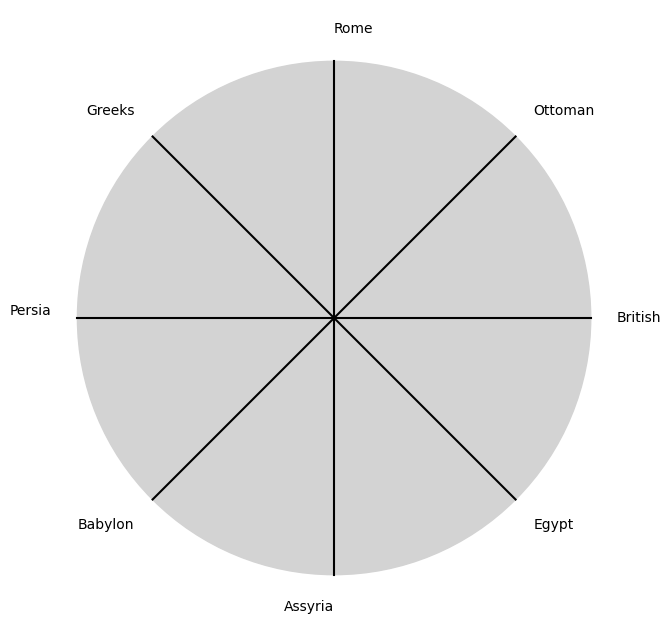

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Clock settings
clock_face_radius = 1.0
number_of_ticks = 8
tick_labels = [
    "Egypt", "Assyria", "Babylon", "Persia",
    "Greeks", "Rome", "Ottoman", "British"
]

# Calculate the angles for each tick (in radians)
angles = np.linspace(0, 2 * np.pi, number_of_ticks, endpoint=False)
# Inverting the order to make it counterclockwise
angles = angles[::-1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

# Draw the clock face
clock_face = plt.Circle((0, 0), clock_face_radius, color='lightgrey', fill=True)
ax.add_patch(clock_face)

# Draw the ticks and labels
for angle, label in zip(angles, tick_labels):
    x = clock_face_radius * np.cos(angle)
    y = clock_face_radius * np.sin(angle)
    
    # Draw the tick
    ax.plot([0, x], [0, y], color='black')
    
    # Positioning the labels slightly outside the clock face
    label_x = 1.1 * clock_face_radius * np.cos(angle)
    label_y = 1.1 * clock_face_radius * np.sin(angle)
    
    # Adjusting label alignment based on its position
    ha = 'center'
    va = 'center'
    if np.cos(angle) > 0:
        ha = 'left'
    elif np.cos(angle) < 0:
        ha = 'right'
    if np.sin(angle) > 0:
        va = 'bottom'
    elif np.sin(angle) < 0:
        va = 'top'
    
    ax.text(label_x, label_y, label, horizontalalignment=ha, verticalalignment=va, fontsize=10)

# Remove axes
ax.axis('off')

# Show the plot
plt.show()


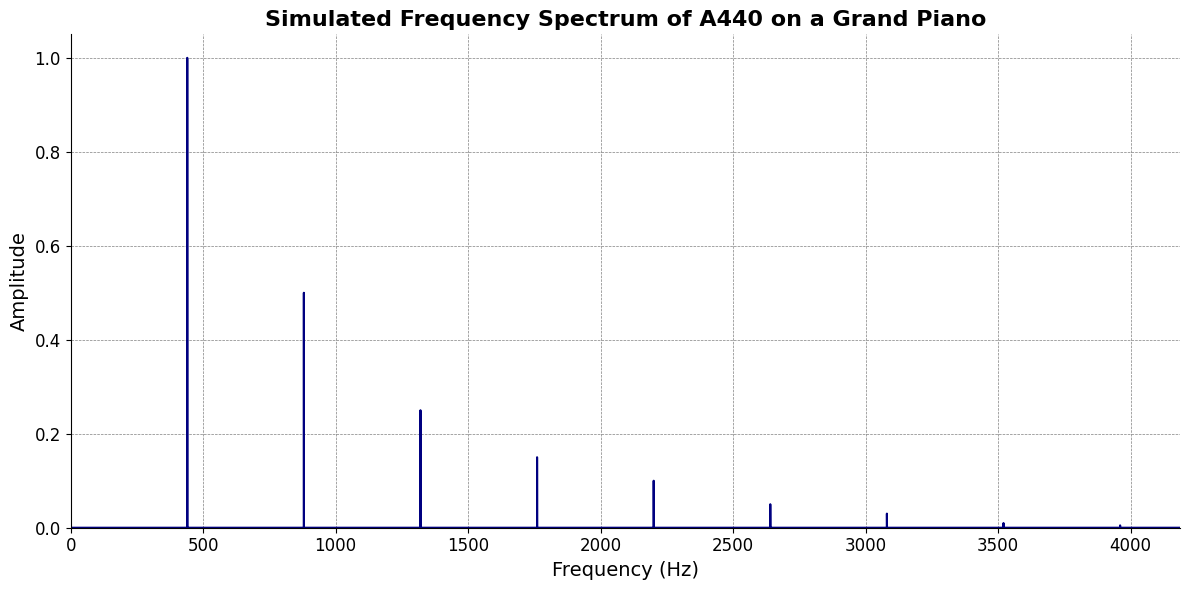

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_rate = 44100  # Hz
duration = 20.0       # seconds
A4_freq = 440.0      # Hz

# Time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Fundamental frequency (A4)
signal = np.sin(2 * np.pi * A4_freq * t)

# Adding overtones (harmonics)
harmonics = [2, 3, 4, 5, 6, 7, 8, 9]  # First few harmonics
amplitudes = [0.5, 0.25, 0.15, 0.1, 0.05, 0.03, 0.01, 0.005]  # Amplitudes for each harmonic

for i, harmonic in enumerate(harmonics):
    signal += amplitudes[i] * np.sin(2 * np.pi * A4_freq * harmonic * t)

# Perform FFT (Fast Fourier Transform)
N = len(signal)
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, 1 / sample_rate)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]), color='navy', lw=1.5)

# Aesthetics improvements
plt.title('Simulated Frequency Spectrum of A440 on a Grand Piano', fontsize=16, weight='bold')
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.xlim(0, 4186)  # Limit to the highest frequency on a piano (C8)
plt.ylim(0, None)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Light grid
plt.grid(color='grey', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
# Recreate the plot with the specified style

plt.figure(figsize=(12, 6))
plt.plot(stages_of_life, growth_rate, marker='o', linestyle='-', color='blue')

# Remove upper and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Stage of Life')
plt.ylabel('Rate of Cell-Division/Growth')
plt.title('Rate of Cell-Division/Growth from Conceptus to 100 Years')

# Annotate the stages
for i, txt in enumerate(growth_rate):
    plt.annotate(txt, (stages_of_life[i], growth_rate[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add a very light dotted grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.show()


NameError: name 'stages_of_life' is not defined

<Figure size 1200x600 with 0 Axes>

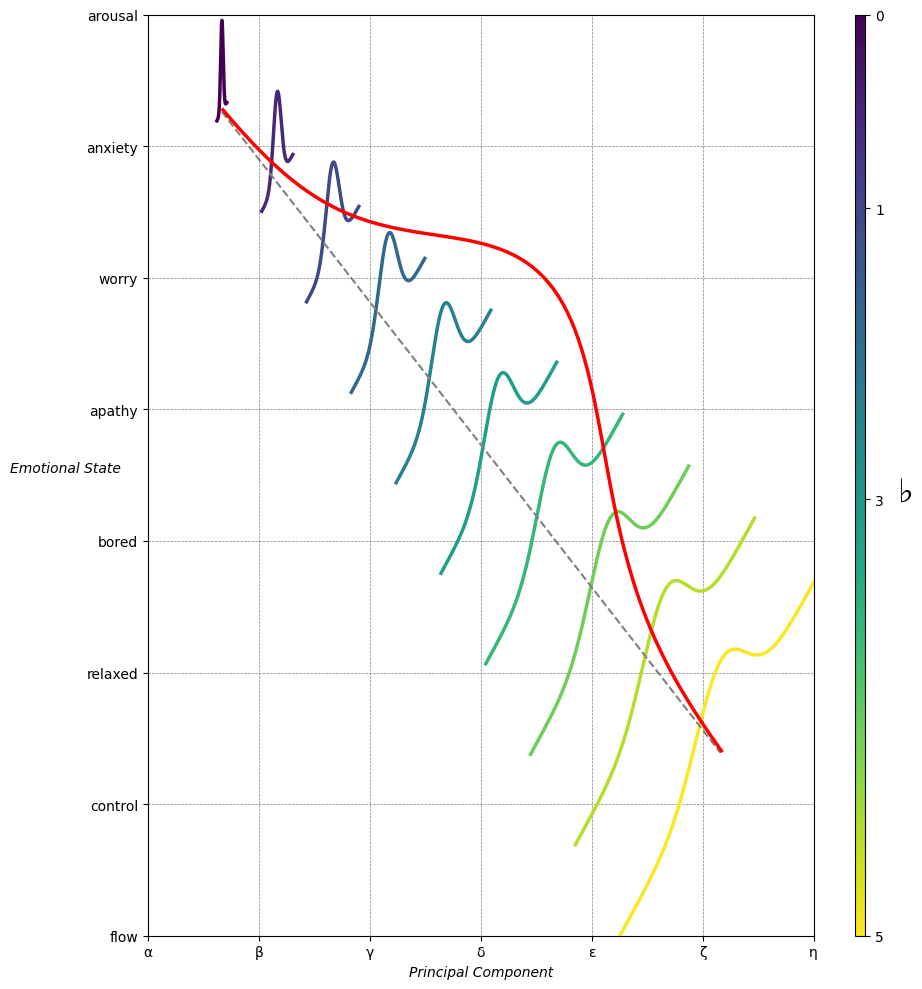

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, PowerNorm

def gaussian(x, mean, std_dev, amplitude=1):
    return amplitude * np.exp(-0.9 * ((x - mean) / std_dev) ** 2)

def overlay_gaussian_on_line(ax, start, end, std_dev):
    x_line = np.linspace(start[0], end[0], 100)
    y_line = np.linspace(start[1], end[1], 100)
    mean = np.mean(x_line)
    y = gaussian(x_line, mean, std_dev, amplitude=std_dev)
    ax.plot(x_line + y / np.sqrt(2), y_line + y / np.sqrt(2), color='red', linewidth=2.5)

fig, ax = plt.subplots(figsize=(10, 10))

intervals = np.linspace(0, 100, 11)
custom_means = np.linspace(1, 23, 10)
custom_stds = np.linspace(.5, 10, 10)

# Change to 'viridis' colormap to get gradations like the older plot
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(custom_stds.min(), custom_stds.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

median_points = []

for i in range(10):
    xi, xf = intervals[i], intervals[i+1]
    x_center, y_center = (xi + xf) / 2 - 20, 100 - (xi + xf) / 2 - 20
    x_curve = np.linspace(custom_means[i] - 3 * custom_stds[i], custom_means[i] + 3 * custom_stds[i], 200)
    y_curve = gaussian(x_curve, custom_means[i], custom_stds[i], amplitude=15)
    
    x_gauss = x_center + x_curve / np.sqrt(2)
    y_gauss = y_center + y_curve / np.sqrt(2) + x_curve / np.sqrt(2)
    
    ax.plot(x_gauss, y_gauss, color=cmap(norm(custom_stds[i])), linewidth=2.5)
    median_points.append((x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2)))

median_points = np.array(median_points)
ax.plot(median_points[:, 0], median_points[:, 1], '--', color='grey')
start_point = median_points[0, :]
end_point = median_points[-1, :]
overlay_gaussian_on_line(ax, start_point, end_point, 24)

ax.grid(True, linestyle='--', linewidth=0.5, color='grey')
ax.set_xlim(-30, 111)
ax.set_ylim(-20, 87)

# Create a new ScalarMappable with a reversed colormap just for the colorbar
cmap_reversed = plt.get_cmap('viridis').reversed()
sm_reversed = ScalarMappable(cmap=cmap_reversed, norm=norm)
sm_reversed.set_array([])

# Existing code for creating the colorbar
cbar = fig.colorbar(sm_reversed, ax=ax, shrink=1, aspect=90)

# Specify the tick positions you want to set
custom_tick_positions = [0.5, 5, 8, 10]  # example positions, you can change these
cbar.set_ticks(custom_tick_positions)

# Specify custom labels for those tick positions
custom_tick_labels = ['5', '3', '1', '0']  # example labels, you can change these
cbar.set_ticklabels(custom_tick_labels)

# Label for the colorbar
cbar.set_label(r'♭', rotation=0, labelpad=15, fontstyle='italic', fontsize=24)


# Label for the colorbar
cbar.set_label(r'♭', rotation=0, labelpad=15, fontstyle='italic', fontsize=24)


cbar.set_label(r'♭', rotation=0, labelpad=15, fontstyle='italic', fontsize=24)

# Add X and Y axis labels with custom font styles
ax.set_xlabel(r'Principal Component', fontstyle='italic')
ax.set_ylabel(r'Emotional State', rotation=0, fontstyle='italic', labelpad=15)

# Add musical modes as X-axis tick labels
# musical_modes = ["Ionian", "Dorian", "Phrygian", "Lydian", "Mixolydian", "Aeolian", "Locrian"]
greek_letters = ['α', 'β','γ', 'δ', 'ε', 'ζ', 'η'] # 'θ' , 'ι', 'κ'
mode_positions = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(greek_letters))
ax.set_xticks(mode_positions)
ax.set_xticklabels(greek_letters, rotation=0)

# Add moods as Y-axis tick labels
moods = ["flow", "control", "relaxed", "bored", "apathy","worry", "anxiety", "arousal"]
mood_positions = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], len(moods))
ax.set_yticks(mood_positions)
ax.set_yticklabels(moods)

# ... (rest of the code unchanged)


plt.tight_layout()
plt.show()

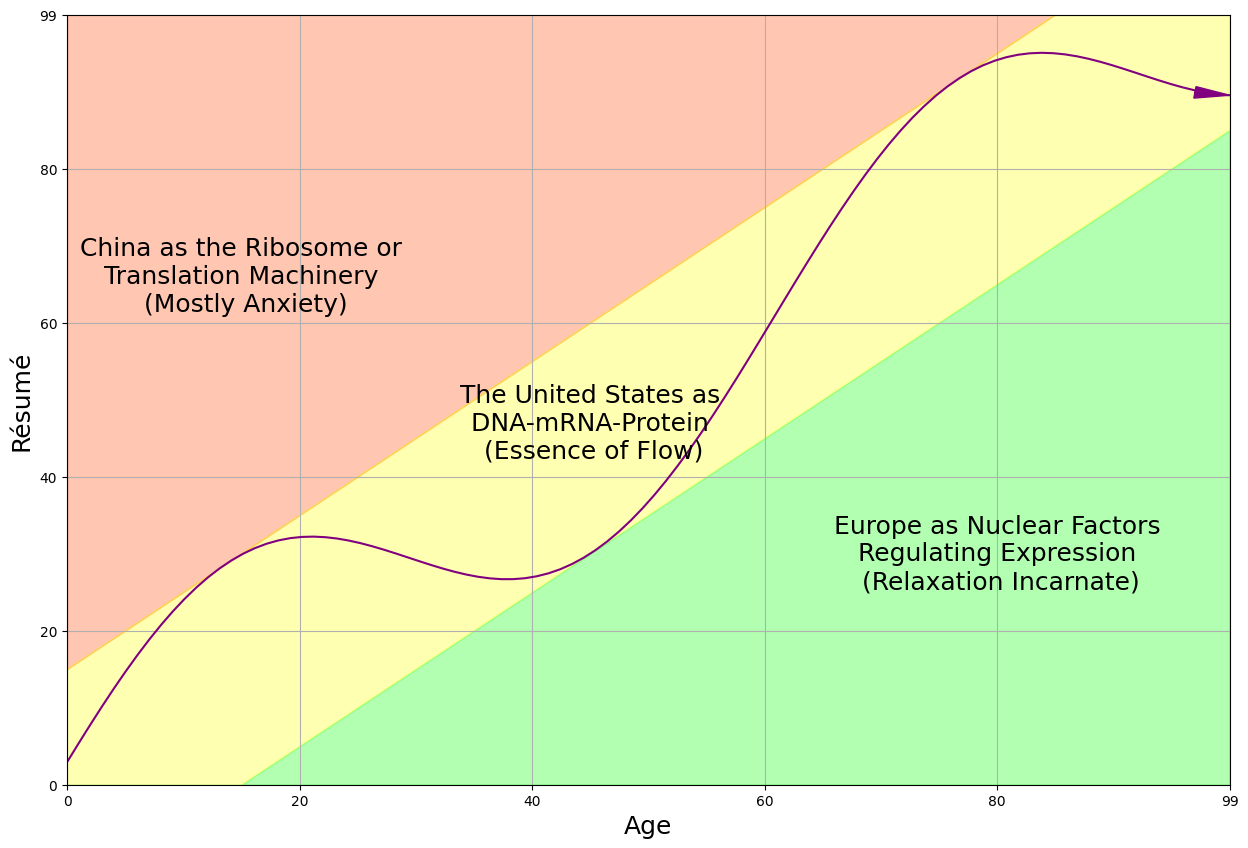

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create data for the skill and challenge levels
skill_levels = np.linspace(0, 10, 100)
challenge_levels = np.linspace(0, 10, 100)

# Define the flow channel boundaries
flow_channel = skill_levels

# Adjust the phase and amplitude of the sinusoid wave
phase = np.pi / 16
amplitude = 1.5
sinusoid = flow_channel + np.sin(skill_levels + phase) * amplitude

# Define the yellow zone boundaries, making it wider
yellow_zone_low = skill_levels - 1.5  # Adjust this value to make the yellow zone wider or narrower
yellow_zone_high = skill_levels + 1.5 # Adjust this value to make the yellow zone wider or narrower

# Plotting
plt.figure(figsize=(15, 10))

# Plot the anxiety and boredom areas
plt.fill_between(skill_levels, yellow_zone_high, 10, color='orangered', alpha=0.3, label='Place/Identification', interpolate=True)
plt.fill_between(skill_levels, 0, yellow_zone_low, color='lime', alpha=0.3, label='Time/Revelation', interpolate=True)
plt.fill_between(skill_levels, yellow_zone_low, yellow_zone_high, color='yellow', alpha=0.3, label='Agent/Evolution', interpolate=True)

# Plot the sinusoid function with the diagonal as its axis
plt.plot(skill_levels, sinusoid, color='purple', linestyle='-')

# Add arrowhead to the sinusoid line
plt.arrow(skill_levels[-2], sinusoid[-2], skill_levels[-1] - skill_levels[-2], sinusoid[-1] - sinusoid[-2],
          color='purple', length_includes_head=True, head_width=0.15, head_length=0.3)

# Set plot labels and title
plt.xlabel('Age', fontsize=18)
plt.ylabel('Résumé', rotation='vertical', fontsize=18)

# Set plot limits and grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)

# Set tick labels
tick_labels = ['0', '20', '40', '60', '80', '99']
plt.xticks(np.linspace(0, 10, 6), tick_labels)
plt.yticks(np.linspace(0, 10, 6), tick_labels)

# Add text annotations to label the areas without shaded background
plt.text(1.5, 6.6, 'China as the Ribosome or\n Translation Machinery \n (Mostly Anxiety)', color='black', ha='center', va='center', fontsize=18)
plt.text(4.5, 4.7, 'The United States as\n DNA-mRNA-Protein \n (Essence of Flow)', color='black', ha='center', va='center', fontsize=18)
plt.text(8, 3, 'Europe as Nuclear Factors\n Regulating Expression \n (Relaxation Incarnate)', color='black', ha='center', va='center', fontsize=18)

# Display the plot
plt.show()

- `ADM`. Update my notes on GitHub and my music repo. My flow diagram is going to start with phonetics, temperament, scales, modes, then quantum, and finally emotion.

- `GPT`. Your notes and flow diagram are now updated to reflect your starting point with phonetics, progressing through temperament, scales, modes, quantum, and concluding with emotion. If there's anything specific you'd like to add or refine, feel free to let me know!

- `ADM`. Let's replace quantum with token or next token.

- `GPT`. Your flow diagram has been updated to replace "quantum" with "next token." If there's anything else you'd like to modify or discuss, I'm here to help!

- `ADM`. Can you provide code for this flow diagram? So the first three are like confluent rivers converging upon node number four. So there's node one coming from northwest, there is node two coming from west, node three coming from southwest, converging on node four. Then node four continues eastward to node five and node five continues eastward to node six. Give me code.

- `GPT`. Here's a Python script using `matplotlib` and `networkx` to create the flow diagram you described. The nodes and edges are arranged to visually represent the confluence of three streams into a central node, which then continues eastward.

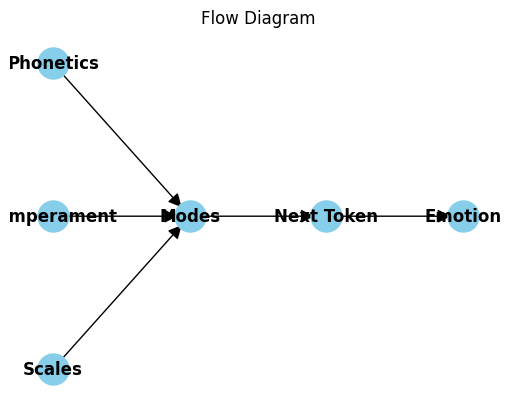

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph: Take 1
G = nx.DiGraph()

# Define the positions of the nodes
positions = {
    1: (-2, 1),   # Node 1: Northwest
    2: (-2, 0),   # Node 2: West
    3: (-2, -1),  # Node 3: Southwest
    4: (0, 0),    # Node 4: Confluence
    5: (2, 0),    # Node 5: Eastward from Node 4
    6: (4, 0)     # Node 6: Eastward from Node 5
}

# Define the edges (connections between nodes)
edges = [
    (1, 4),  # Node 1 to Node 4
    (2, 4),  # Node 2 to Node 4
    (3, 4),  # Node 3 to Node 4
    (4, 5),  # Node 4 to Node 5
    (5, 6)   # Node 5 to Node 6
]

# Add the nodes with their positions
for node in positions:
    G.add_node(node, pos=positions[node])

# Add the edges
G.add_edges_from(edges)

# Get the positions of nodes for drawing
node_positions = nx.get_node_attributes(G, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G, pos=node_positions, node_size=500, node_color='skyblue')

# Draw the edges
nx.draw_networkx_edges(G, pos=node_positions, edgelist=edges, arrowstyle='-|>', arrowsize=20, edge_color='black')

# Draw the labels for each node
labels = {
    1: "Phonetics",
    2: "Temperament",
    3: "Scales",
    4: "Modes",
    5: "Next Token",
    6: "Emotion"
}
nx.draw_networkx_labels(G, pos=node_positions, labels=labels, font_size=12, font_weight='bold')

# Display the flow diagram
plt.title("Flow Diagram")
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

1. **Node Positions**: Nodes 1, 2, and 3 are positioned to the northwest, west, and southwest of the central node (Node 4). Nodes 4, 5, and 6 are arranged in a straight line eastward.
   
2. **Edges**: Directed edges connect Nodes 1, 2, and 3 to Node 4, symbolizing the convergence. Then, Node 4 connects to Node 5, which further connects to Node 6.

3. **Node Labels**: The nodes are labeled according to your flow diagram: Phonetics, Temperament, Scales, Modes, Next Token, and Emotion.

Run this code in a Python environment with `matplotlib` and `networkx` installed, and it will produce a visual flow diagram based on your description.

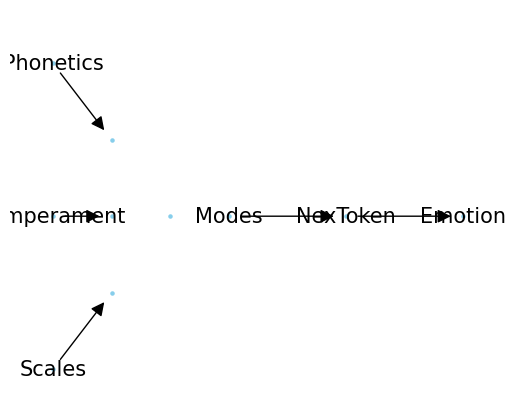

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph: Take 1
G = nx.DiGraph()

# Define the positions of the nodes
positions = {
    1: (-2, 1),   # Node 1: Northwest
    8: (-1,.5), ### insertion
    2: (-2, 0),   # Node 2: West
    10: (-1,0), ### insertion
    9: (-1,-.5), ### insertion
    3: (-2, -1),  # Node 3: Southwest
    7: (0, 0), ### insertion 
    4: (1, 0),    # Node 4: Confluence
    5: (3, 0),    # Node 5: Eastward from Node 4
    6: (5, 0)     # Node 6: Eastward from Node 5
}

# Define the edges (connections between nodes)
edges = [
    (1, 8),  # Node 1 to Node 4
    (2, 10),  # Node 2 to Node 4
    (3, 9),  # Node 3 to Node 4
    (4, 5),  # Node 4 to Node 5
    (5, 6)   # Node 5 to Node 6
]

# Add the nodes with their positions
for node in positions:
    G.add_node(node, pos=positions[node])

# Add the edges
G.add_edges_from(edges)

# Get the positions of nodes for drawing
node_positions = nx.get_node_attributes(G, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G, pos=node_positions, node_size=5, node_color='skyblue')

# Draw the edges
nx.draw_networkx_edges(G, pos=node_positions, edgelist=edges, arrowstyle='-|>', arrowsize=20, edge_color='black')

# Draw the labels for each node
labels = {
    1: "Phonetics",
    2: "Temperament",
    3: "Scales",
    4: "Modes",
    5: "NexToken",
    6: "Emotion"
}
nx.draw_networkx_labels(G, pos=node_positions, labels=labels, font_size=15, font_weight='normal')

# Display the flow diagram
plt.title(" ")
plt.axis('off')  # Hide axes
plt.show()

What you're describing is an intricate visualization of information flow across different scales—from subatomic particles to cosmic structures, finance, and social networks—using the concept of photons as carriers of information. This visualization would essentially map nodes (points of information) and edges (connections or flows of information) with arrows representing the directional flow of photons, or in a broader sense, the transfer of energy or information.

Here's some Python code using NetworkX and Matplotlib to create a basic visualization of this concept:



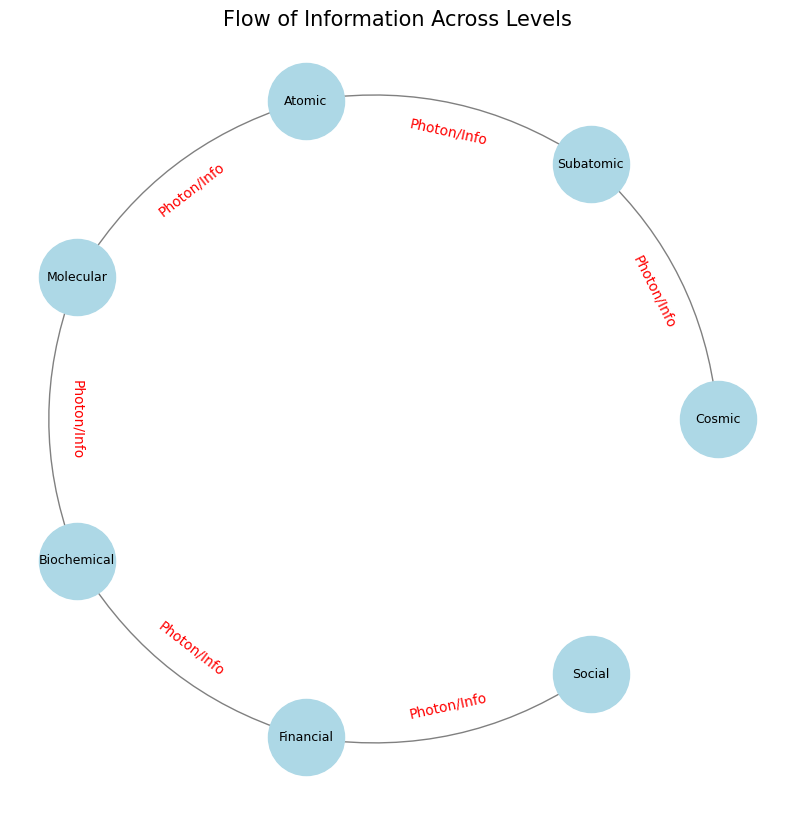

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing different levels (subatomic, atomic, cosmic, financial, social)
levels = ['Cosmic', 'Subatomic', 'Atomic', 'Molecular', 'Biochemical', 'Financial', 'Social']

# Add nodes to the graph
G.add_nodes_from(levels)

# Add edges to represent the flow of information (photons)
# Assuming the flow is directional from more fundamental levels to more complex ones
edges = [('Cosmic', 'Subatomic'),
         ('Subatomic', 'Atomic'),
         ('Atomic', 'Molecular'),
         ('Molecular', 'Biochemical'),
         ('Biochemical', 'Financial'),
         ('Financial', 'Social')]

# Add edges to the graph
G.add_edges_from(edges)

# Define positions for the nodes in a circular layout
pos = nx.circular_layout(G)

# Set the figure size (width, height)
plt.figure(figsize=(10, 10))  # Adjust the size as needed

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

# Draw the edges with arrows and create space between the arrowhead and the node
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='grey',
                       connectionstyle='arc3,rad=0.2')  # Adjust rad for more/less space

# Draw the labels for the nodes
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='normal')

# Draw the edge labels (optional, to label the flow as 'Photon' or 'Information')
edge_labels = {edge: 'Photon/Info' for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Set the title and display the plot
plt.title('Flow of Information Across Levels', fontsize=15)
plt.axis('off')
plt.show()




### Explanation:
- **Nodes** represent different levels of complexity, from the subatomic to the social.
- **Edges** represent the flow of information, symbolized by photons or analogous concepts, moving from one level to the next.
- The **circular layout** helps to visualize these connections in a more interconnected way, reflecting how these processes are not linear but cyclical or networked.

### Visualization Concept:
This code creates a directed graph where each node represents a different scale of information processing or complexity, and each edge represents the flow of information (or photons) between these levels. The graph is set up to highlight the idea that information flows through various levels, from the most fundamental (subatomic) to the most complex (social networks), with photons or analogous concepts acting as the arrows of information transfer.

Let me know if you would like to customize this further or explore another aspect!

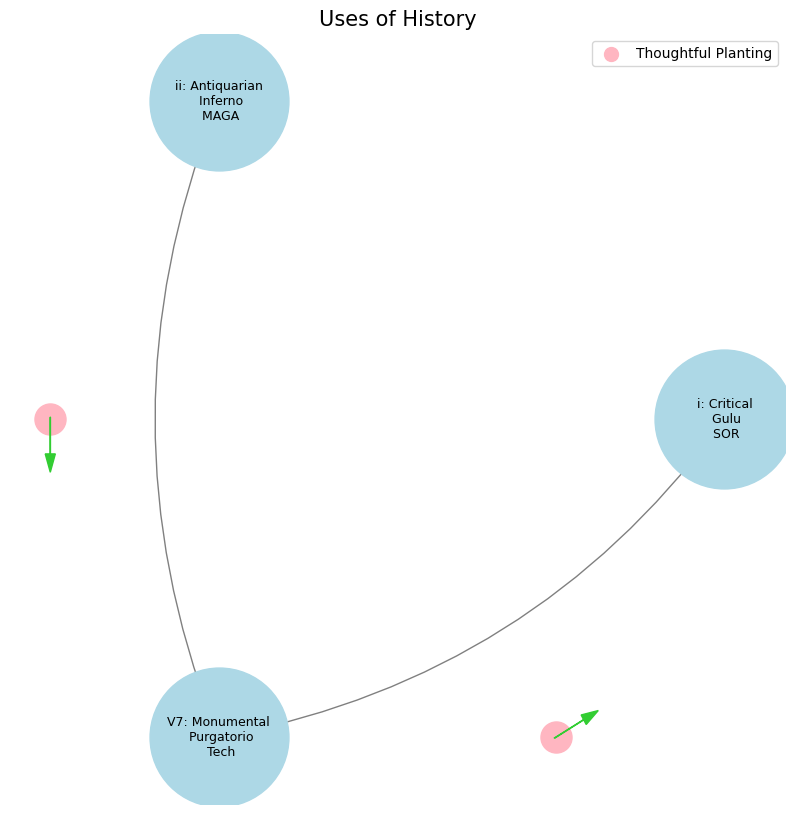

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing different levels (subatomic, atomic, cosmic, financial, social)
levels = ['i: Critical\n Gulu\n SOR', 'ii: Antiquarian\n Inferno\n MAGA', 'V7: Monumental\n Purgatorio\n Tech']

# Add nodes to the graph
G.add_nodes_from(levels)

# Add edges to represent the flow of information (photons)
# Assuming the flow is directional from more fundamental levels to more complex ones
edges = [('ii: Antiquarian\n Inferno\n MAGA', 'V7: Monumental\n Purgatorio\n Tech'),
         ('V7: Monumental\n Purgatorio\n Tech', 'i: Critical\n Gulu\n SOR'),]

# Add edges to the graph
G.add_edges_from(edges)

# Define positions for the nodes in a circular layout
pos = nx.circular_layout(G)

# Set the figure size (width, height)
plt.figure(figsize=(10, 10))  # Adjust the size as needed

# Draw the main nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=10000)

# Draw the edges with arrows and create space between the arrowhead and the node
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='grey',
                       connectionstyle='arc3,rad=0.2')  # Adjust rad for more/less space

# Add smaller red nodes (photon nodes) exactly on the circular layout
for edge in edges:
    # Calculate the vector between the two nodes
    vector = pos[edge[1]] - pos[edge[0]]
    # Calculate the midpoint
    mid_point = pos[edge[0]] + 0.5 * vector
    # Normalize to ensure it's on the circle
    radius = np.linalg.norm(pos[edge[0]])
    mid_point_on_circle = mid_point / np.linalg.norm(mid_point) * radius
    # Draw the small red photon node at the midpoint on the circular layout
    plt.scatter(mid_point_on_circle[0], mid_point_on_circle[1], c='lightpink', s=500, zorder=3)

    # Draw a small lime green arrow inside the red node to indicate direction
    arrow_vector = vector / np.linalg.norm(vector) * 0.1  # Scale down arrow size
    plt.arrow(mid_point_on_circle[0] - 0.05 * arrow_vector[0],
              mid_point_on_circle[1] - 0.05 * arrow_vector[1],
              arrow_vector[0], arrow_vector[1],
              head_width=0.03, head_length=0.05, fc='limegreen', ec='limegreen', zorder=4)

# Draw the labels for the main nodes
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='normal')

# Add a legend for "Photon/Info"
plt.scatter([], [], c='lightpink', s=100, label='Thoughtful Planting')  # Empty scatter for the legend
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, loc='upper right')

# Set the title and display the plot
plt.title('Uses of History', fontsize=15)
plt.axis('off')
plt.show()